<a id="Dimensionality Reduction"></a>
# <u>Dimensionality Reduction</u>

Dimensionality reduction is the process of reducing the dimension of the feature set while maintaining its structure and usefulness.

## <u>Reasons for dimentionality reduction</u>

- Most points in a high-dimensional hypercube are very close to the border and at the risk of being very sparse, making predictions much less reliable than in lower dimensions.
- Very large number of features for each training instance may make training extremely slow.
- Difficult to visualize dataset containing large number of features.

## <u>Pros</u>

- Less time in training the dataset.
- Easy visualization of the dataset containing 2 or 3 principle features.
- May (May not) result in higher performance.

## <u>Cons</u>

- Loss of information.

Dimensionality reduction can be achieved in the following ways:

- <b> Feature Elimination </b>: We reduce the feature space by eliminating features. This has a disadvantage though, as we gain no information from those features that you have dropped.

- <b> Feature Selection </b>: We apply some statistical tests in order to rank them according to their importance and then select a subset of features for our work. This again suffers from information loss and is less stable as different test gives different importance score to features.

- <b> Feature Extraction </b>: We create new independent features, where each new independent feature is a combination of each of the old independent features.

<a id="Main Approaches for Dimensionality Reduction"></a>
## <u>Main Approaches for Dimensionality Reduction </u>

### <u> Projection </u>

Projecting high dimensional data on a low dimentional hyperplane, minimizing the variance. (PCA)



<a id="Projection"></a>
## <u> Projection </u>

<a id="PCA - Principal Component Analysis"></a>
### <u> PCA - Principal Component Analysis (Vanilla PCA) </u>
- Principal components analysis is the main method used for linear dimension reduction.
- It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized, with the maximum variance, maximum information is preserved. In another words, it selects the hyperplane(s) that minimizes the mean squared distance between the original dataset and its projection onto that hyperplane(s).
- The first principle component accounts for the maximum variance in the data and so on ...
- All the components in lower-dimensional space are linearly uncorrelated.
- Each of the new features or components created after PCA are all independent of one another.

<a id="PCA for Data Visualization and Dimentionality Reduction"></a>
### <u>Application 1 : PCA for Data Visualization and Dimentionality Reduction </u>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data iris.csv")
print('Total Row : ', len(data))
data.head()

Total Row :  150


,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
data['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [3]:
X = data.drop('Species', axis=1)
y = data['Species']

<a id="Standardization"></a>
### <u>Step 1:  Standardization</u>

Un-standardized data is sensitive to the variances of the initial variables. The variables with larger ranges dominates over those with small ranges (a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which leads to biased results. Transforming the data to comparable scales prevents this problem.

Mathematically, this can be done by subtracting the mean (or emperical mean - sample mean of each column shifted to zero) and dividing by the standard deviation for each value of each variable.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

new_df = pd.DataFrame(data = X_std, columns = list(X))
new_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


<a id="Eigendecomposition"></a>
### <u>Step 2:  Eigendecomposition - Computing Eigenvectors and Eigenvalues</u>

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

#### <u> Calculating Covariance Matrix </u>

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix , which is a matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$$Cov(𝑋, 𝑌 ) = \frac{\sum(x_i - \bar{x}) (y_i - \bar{y})}{N-1}$$

In [5]:
import numpy as np

covariance_matrix = np.cov(X_std.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Next, we perform an eigendecomposition on the covariance matrix:

All the three approaches yield the same eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

<a id="Selecting Principal Components"></a>
### <u>Step 3:  Selecting Principal Components</u>

#### <u>Sorting Eigenpairs </u>
The goal of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they all have the same unit length 1.

In order to decide which eigenvector(s) can be dropped without losing too much information, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

The common approach is to rank the eigenvalues from highest to lowest.

In [6]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 

Eigenvalues: 
 [2.93808505 0.9201649  0.14774182 0.02085386] 



#### <u> Explained Variance </u>
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [7]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


<BarContainer object of 4 artists>

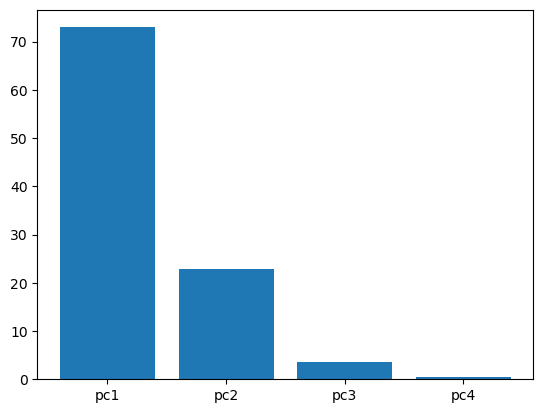

In [8]:
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], variance_explained)

In [9]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.96244541  95.8132072   99.48212909 100.        ]


In the above array we see that the first feature explains roughly 72.77% of the variance within our data set while the first two explain 95.8 and so on. 

### Determining how many components

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Explained variance vs Number of components')

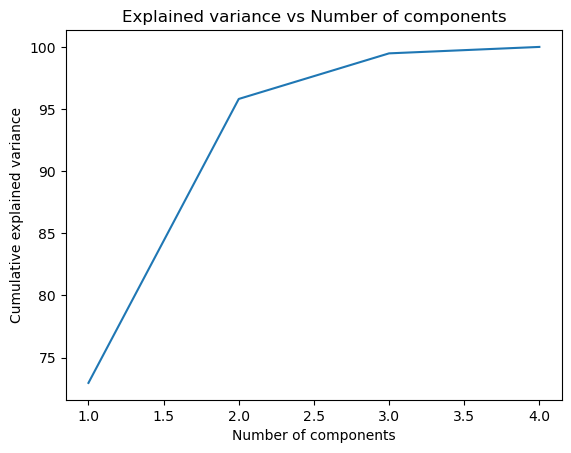

In [10]:
sns.lineplot(x = [1,2,3,4], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

#### <u>Projection Matrix </u>
The projection matrix is used to transform the Input data(X) onto the new feature subspace. Projection Matrix is a matrix of concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our 2-dimensional eigenvector matrix .

In [11]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [12]:
# Getting the product of original standardized X and the eigenvectors 
data_pca = X.dot(projection_matrix)
data_pca.columns = ['pc1','pc2']
data_pca['label'] = data['Species']
data_pca.head()

,pc1,pc2,label
0,2.640270,-5.204041,Setosa
1,2.670730,-4.666910,Setosa
2,2.454606,-4.773636,Setosa
3,2.545517,-4.648463,Setosa
4,2.561228,-5.258629,Setosa


### <u>Shortcut - PCA in scikit-learn</u>


In [13]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
feats = ['sepal_length','sepal_width','petal_length','petal_width']
X = data.drop('species', axis=1).values
y = data['species'].values

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [16]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf['species'] = y
pdf.head()

,pc1,pc2,pc3,pc4,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


In [18]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.93808505 0.9201649  0.14774182 0.02085386]
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


<BarContainer object of 4 artists>

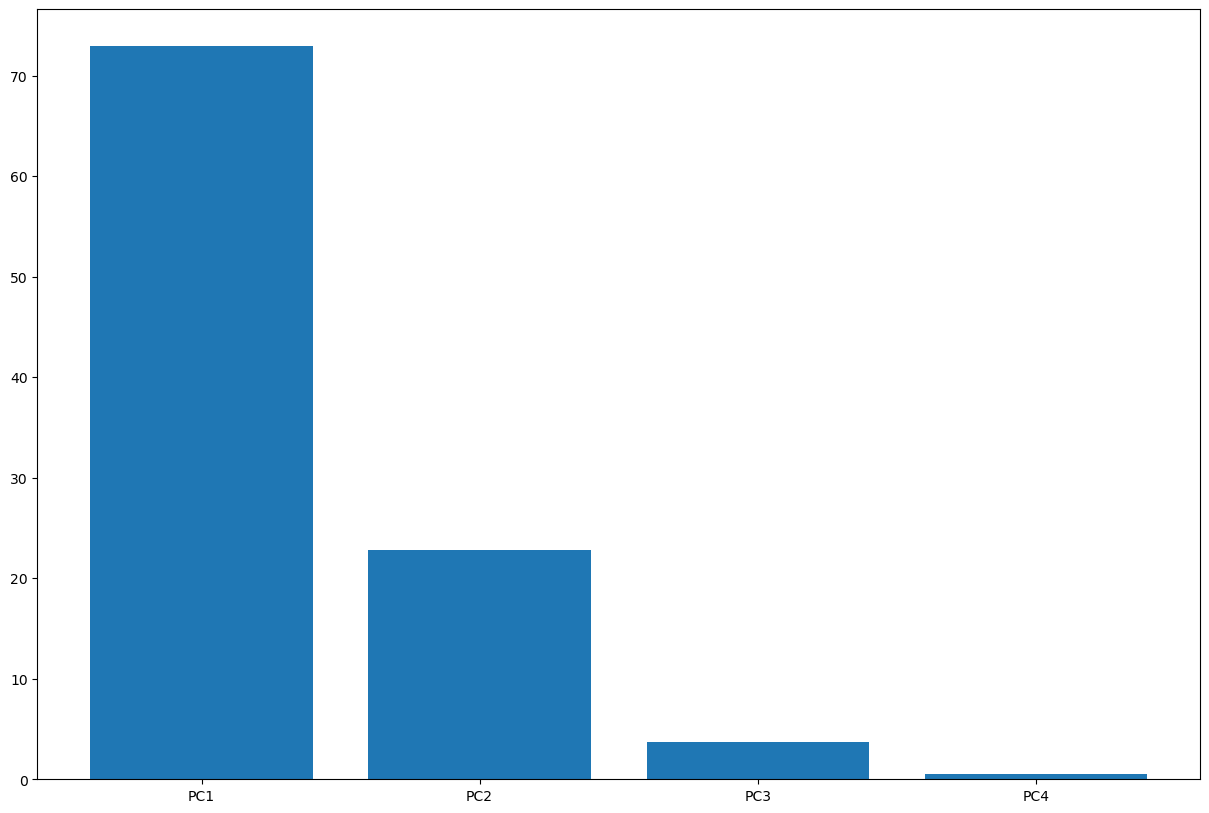

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_ * 100)

### Reduksi Fitur

In [20]:
pca = PCA(n_components=2)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['species'] = y
X_std_pca.head()

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
